<a href="https://colab.research.google.com/github/ethankyle360/ML4SupplyChain/blob/main/section_10_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Manipulate data to get weekly sales of a UK retailer, you will need the month and trend to fit a linear regression model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
retail_clean = pd.read_csv('retail_clean.csv')

In [2]:
retail_clean.info()
retail_clean.InvoiceDate
retail_clean['InvoiceDate'] = pd.to_datetime(retail_clean['InvoiceDate'])
retail_clean['date'] = retail_clean['InvoiceDate'].dt.strftime('%Y-%m-%d')
retail_clean['date'] = pd.to_datetime(retail_clean['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110218 entries, 0 to 110217
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   110218 non-null  int64  
 1   Invoice      110218 non-null  int64  
 2   StockCode    110218 non-null  object 
 3   Description  110218 non-null  object 
 4   Quantity     110218 non-null  int64  
 5   InvoiceDate  110218 non-null  object 
 6   Price        110217 non-null  float64
 7   Customer ID  110217 non-null  float64
 8   Country      110217 non-null  object 
 9   Revenue      110217 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 8.4+ MB


In [6]:
retail_clean['month'] = retail_clean.date.dt.month
retail_clean['year'] = retail_clean.date.dt.year
# .dt.week is depreciated in the latest version on pandas
retail_clean['week'] = retail_clean.date.dt.isocalendar().week

In [7]:
retail_clean.columns

Index(['Unnamed: 0', 'Invoice', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'Price', 'Customer ID', 'Country', 'Revenue', 'date',
       'month', 'year', 'week'],
      dtype='object')

In [8]:
retail_clean.month.describe()

count    110218.000000
mean          4.907130
std           4.431292
min           1.000000
25%           2.000000
50%           3.000000
75%          12.000000
max          12.000000
Name: month, dtype: float64

In [9]:
time_series = retail_clean.groupby(['week','month','year']).agg(date = ('date','first'),
        total_sales = ('Quantity', np.sum)).reset_index().sort_values('date')

<Axes: xlabel='date', ylabel='total_sales'>

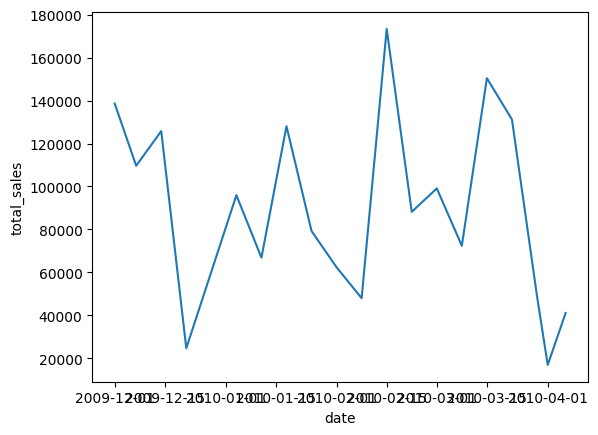

In [10]:
sns.lineplot(x='date', y='total_sales', data=time_series)

In [11]:
from sklearn.linear_model import LinearRegression

time_series['trend'] = range(time_series.shape[0])
time_series['month'] = time_series['month'].astype('category')

In [13]:
### Drop the columns
X = time_series.drop(['week', 'year', 'date', 'total_sales'], axis=1)

names = pd.get_dummies(X).columns
X = pd.get_dummies(X).values
y = time_series.total_sales.values

In [16]:
model = LinearRegression()

model.fit(X, y)

model.get_params()
model.coef_

dict1 = list(zip(names, model.coef_))

prediction = model.predict(X)

time_series['prediction'] = prediction

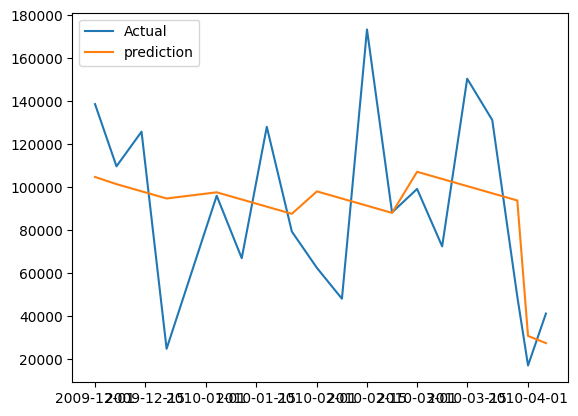

In [18]:
import matplotlib.pyplot as plt

plt.plot(time_series.date, time_series.total_sales, label='Actual')
plt.plot(time_series.date, time_series.prediction, label='prediction')
plt.legend(loc = 'upper left')
plt.show()

In [20]:
### Forecasting
max_date = time_series.date.max()

dates = pd.DataFrame({'date':pd.date_range('2011-12-12', '2012-08-5', freq='W')})

time_series = pd.concat([time_series, dates], axis=0)

In [21]:
time_series['trend'] = range(time_series.shape[0])
time_series['month'] = time_series['date'].dt.month
time_series['month'] = time_series['month'].astype('category')

In [31]:
### Dropping columns
X = time_series.drop(['week', 'year', 'date', 'total_sales'], axis=1)

names = pd.get_dummies(X).columns
X = pd.get_dummies(X).values
y = time_series.total_sales.values

In [36]:
#prediction = model.predict(X)

In [38]:
#time_series['prediction'] = prediction

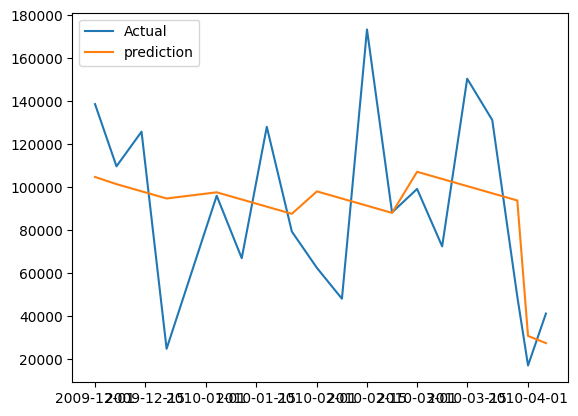

In [39]:
plt.plot(time_series.date, time_series.total_sales, label='Actual')
plt.plot(time_series.date, time_series.prediction, label='prediction')
plt.legend(loc = 'upper left')
plt.show()